In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
sample = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv")
sample.head()

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4


In [3]:
train_dataset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
X = train_dataset.drop(["Rating"], axis = 1)
print(X.shape)
y = train_dataset["Rating"]
print(y.shape)

(13636, 14)
(13636,)


In [4]:
train_dataset

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [5]:
y.value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [6]:
test_dataset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

In [7]:
test_dataset.columns


Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'Recipe_Review'],
      dtype='object')

In [8]:
train_dataset.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


# **EDA**

**Exploring the distributions of numerical variables like 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'UserReputation', 'BestScore'.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

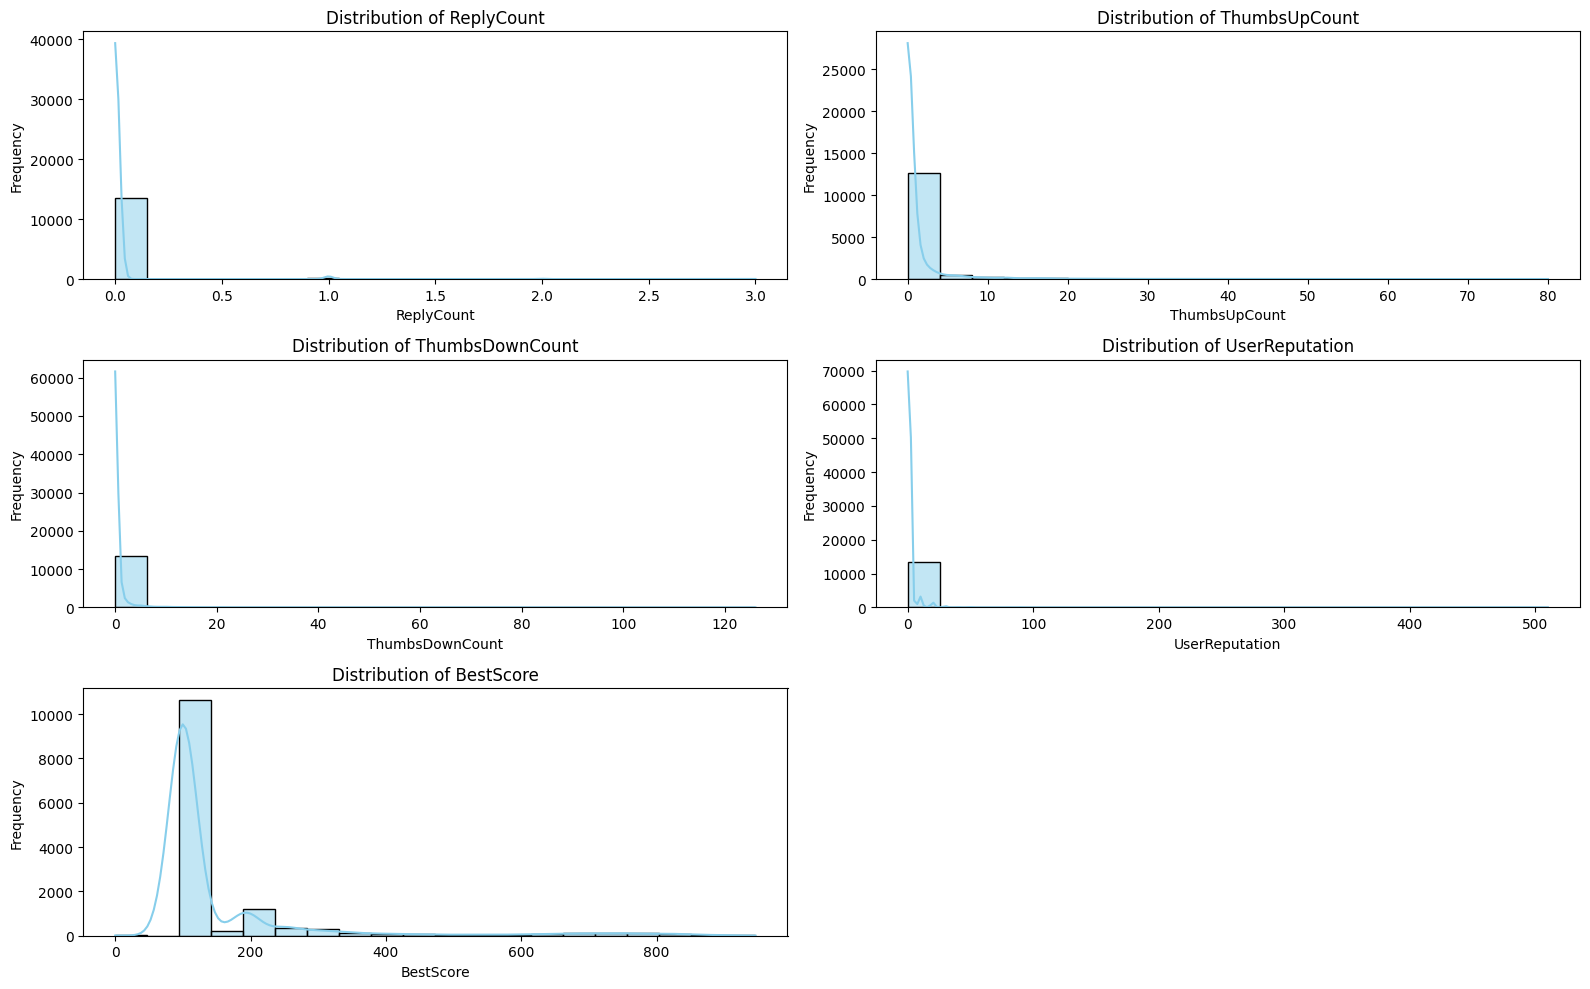

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical variables
numerical_vars = ['ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'UserReputation', 'BestScore']

# Plot distributions
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_dataset[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **zoom all the graphs or rescalling for example 0 to 10 instead of o to 80**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

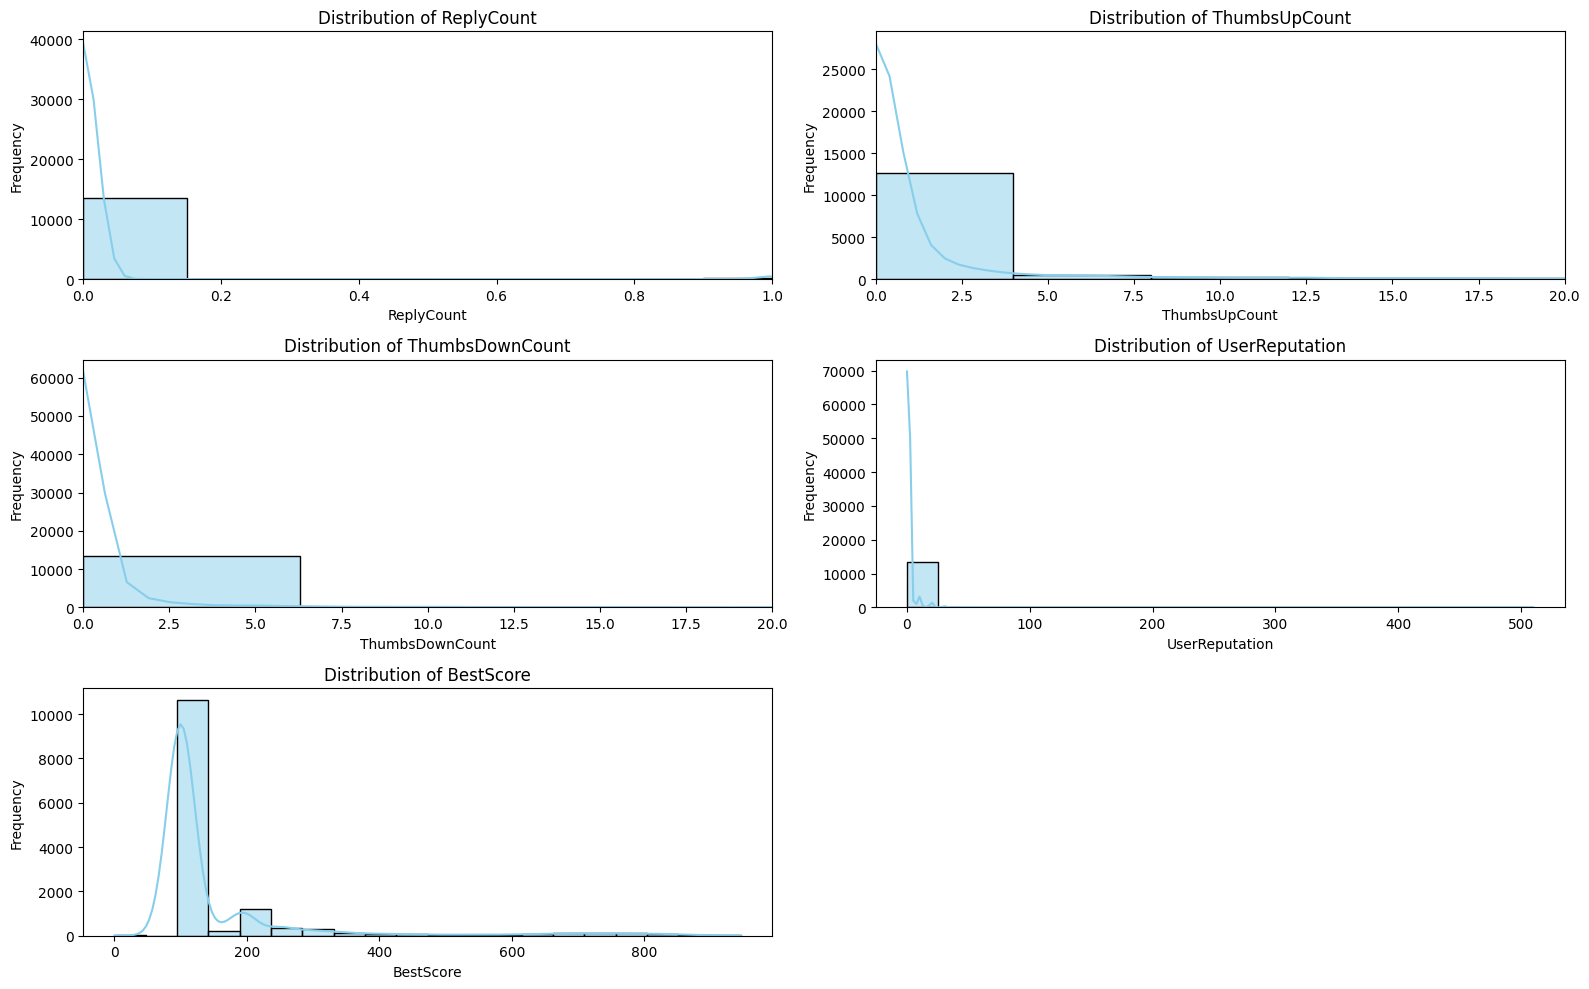

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical variables
numerical_vars = ['ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'UserReputation', 'BestScore']

# Plot distributions
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_dataset[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Set limits or adjust scale
    if col == 'ReplyCount':
        plt.xlim(0, 1)  # Example: Set the y-axis limit to 0 to 100 for UserReputation
    elif col == 'ThumbsUpCount':
        plt.xlim(0,20) # Example: Set the y-axis limit to 0 to 50 for BestScore
    elif col == 'ThumbsDownCount':
        plt.xlim(0, 20)

plt.tight_layout()
plt.show()


Decisions we can take :
1. Distribution of ReplyCount - distribution is highly skewed to the right - major recipes have low number of replies
2.Ditribution of ThumbsUpCount - distribution is highly skewed to the right - most recipes receive a low number of thumbs-up ratings.
3. Ditribution of ThumbsDownCount - distribution is concentrated to 0 - very few recipes receiving thumbs-down ratings.
4. Ditribution of UserReputatiion - distribution is highly skewed to the right - majority of users have relatively low reputation scores.
5. Ditribution of BestScore - The distribution appears relatively uniform, with a slight skew towards higher scores- identify common attributes among recipes.


**Understanding the distribution of the target variable 'Rating' and checking for any class imbalance.**


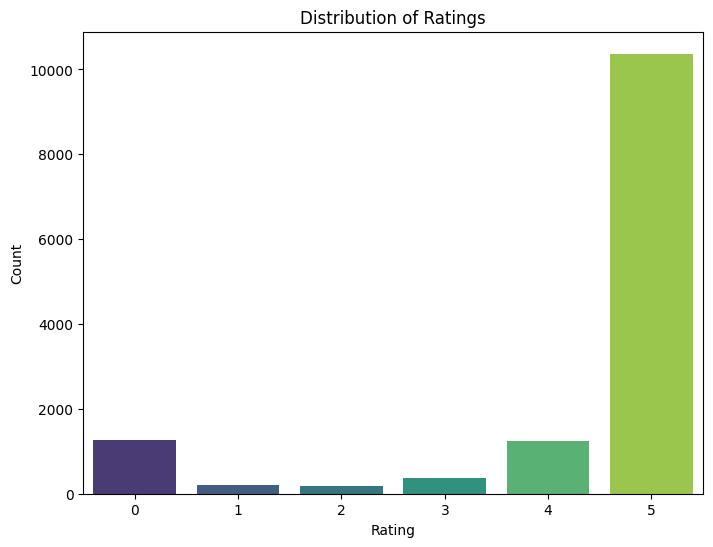

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_dataset, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Correlation Analysis: **Examining the correlation matrix among numerical variables to identify potential relationships, especially with the target variable 'Rating'****

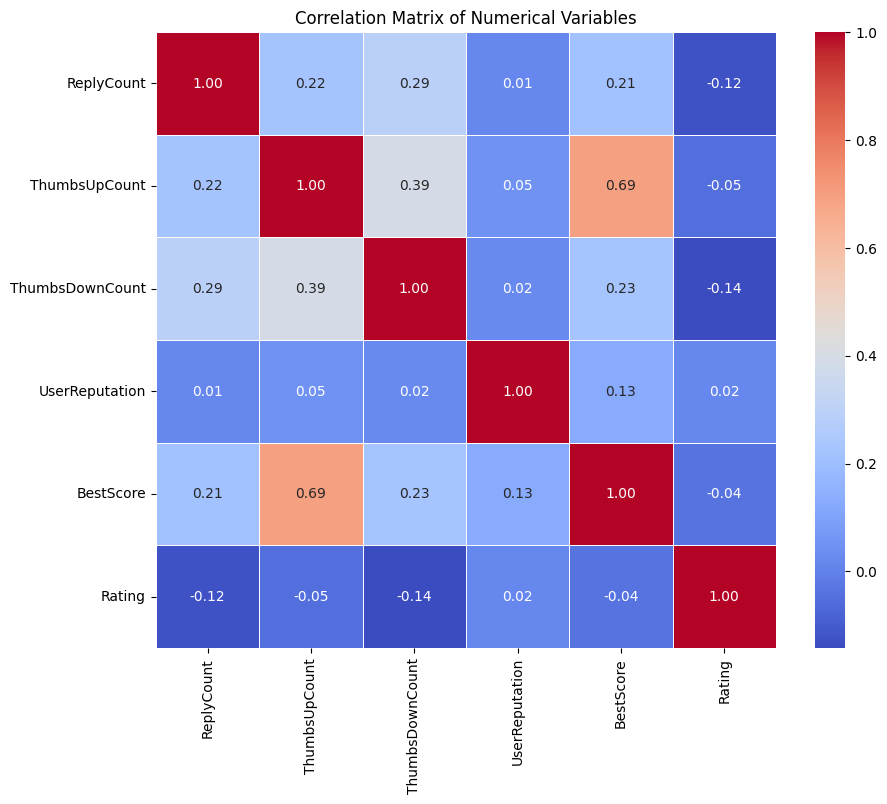

In [13]:
numerical_vars = ['ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'UserReputation', 'BestScore', 'Rating']

# Calculate the correlation matrix
corr_matrix = train_dataset[numerical_vars].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Decision - After analyzing the correlation matrix, it appears that 'ThumbsUpCount' and 'BestScore' have the strongest negative correlations with 'Rating'. 
'Rating' strongly correlated with 'ThumbsUpCount' and 'BestScore'.

**Interaction Analysis: Exploring how different combinations of features interact with each other and affect the target variable, especially numerical features like 'ThumbsUpCount' vs. 'ThumbsDownCount'.**

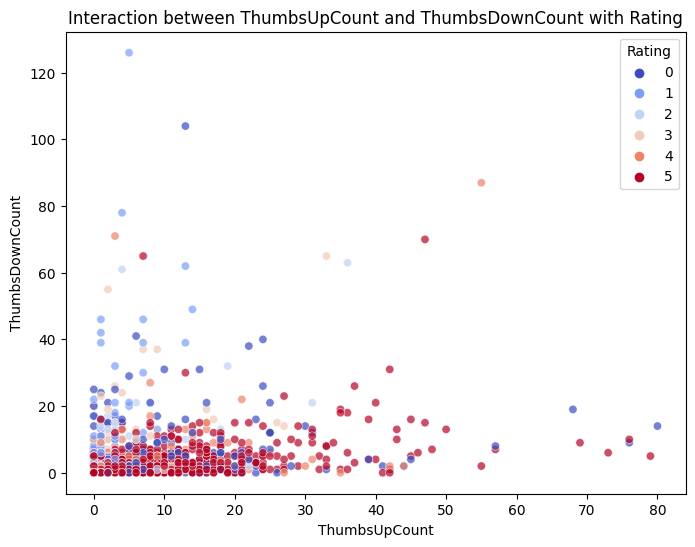

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_dataset, x='ThumbsUpCount', y='ThumbsDownCount', hue='Rating', palette='coolwarm', alpha=0.7)
plt.title('Interaction between ThumbsUpCount and ThumbsDownCount with Rating')
plt.xlabel('ThumbsUpCount')
plt.ylabel('ThumbsDownCount')
plt.legend(title='Rating')
plt.show()

Decision - After looking at how 'ThumbsUpCount' and 'ThumbsDownCount' interact, consider combining them to better understand how positive and negative feedback together influence the target variable 'Rating'.

# # **Preprocessing on Train dataset**


In [15]:
from sklearn.preprocessing import OneHotEncoder


The One-Hot Encoder is used to transform categorical variables into a format that can be provided to machine learning algorithms to improve model performance and accuracy. It converts categorical variables, such as 'RecipeName', into binary vectors where each category becomes a binary feature. This encoding ensures that categorical variables are represented in a way that algorithms can interpret and use effectively for analysis and prediction

use pipeline instead of function


In [16]:
def preprocessing(data):
    data = data.drop(['RecipeCode','CommentID','UserID','UserName','CreationTimestamp'], axis =1)
    data = data.reset_index()
    one_hot_encoder = OneHotEncoder()
    encoded_recipe_names = one_hot_encoder.fit_transform(data[["RecipeName"]])
    encoded_recipe_names_df = pd.DataFrame(encoded_recipe_names.toarray(), columns=one_hot_encoder.get_feature_names_out(['RecipeName']))
    print(encoded_recipe_names_df.shape)
    final_df = pd.concat([data, encoded_recipe_names_df], axis=1)
    final_df.drop('RecipeName',axis=1,inplace=True)
    return final_df


# **TFI-DF Vectorizer**
convert text data to numerical vectors

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
def tfidf(train_data, test_data):
    train_data["Recipe_Review"]= train_data["Recipe_Review"].replace({None:'Unknown'})
    train_data["Recipe_Review"] = train_data["Recipe_Review"].str.lower()
    test_data["Recipe_Review"]= test_data["Recipe_Review"].replace({None:'Unknown'})
    test_data["Recipe_Review"] = test_data["Recipe_Review"].str.lower()
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(train_data["Recipe_Review"])
    tfidf_matrix_train = tfidf_vectorizer.transform(train_data["Recipe_Review"])
    tfidf_matrix_test = tfidf_vectorizer.transform(test_data["Recipe_Review"])
    tfidf_df_train=pd.DataFrame(tfidf_matrix_train.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
    tfidf_df_test=pd.DataFrame(tfidf_matrix_test.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
    train_data.drop(columns=['Recipe_Review'], inplace=True)
    test_data.drop(columns=['Recipe_Review'], inplace=True)
    df_train= pd.concat([train_data,tfidf_df_train],axis=1)
    df_train.drop(columns=["index","ID"],inplace=True)
    df_test= pd.concat([test_data,tfidf_df_test],axis=1)
    df_test.drop(columns=["index","ID"],inplace=True)
    return df_train, df_test

In [18]:
X_process_train =  preprocessing(X)
X_process_test = preprocessing(test_dataset)
df_process_train_idf, df_process_test_df = tfidf(X_process_train, X_process_test)

(13636, 100)
(4546, 100)


In [19]:
df_process_train_idf

,RecipeNumber,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,RecipeName_Amish Breakfast Casserole,RecipeName_Apple Pie,RecipeName_Asian Chicken Thighs,RecipeName_Bacon Macaroni Salad,...,zuc,zucc,zucchini,zucchinie,zucchinis,zuchiini,zuchini,zuchinni,zucs,zuke
0,71,20,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,88,1,0,0,1,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,98,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13632,6,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13633,37,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13634,63,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
 df_process_test_df

,RecipeNumber,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,RecipeName_Amish Breakfast Casserole,RecipeName_Apple Pie,RecipeName_Asian Chicken Thighs,RecipeName_Bacon Macaroni Salad,...,zuc,zucc,zucchini,zucchinie,zucchinis,zuchiini,zuchini,zuchinni,zucs,zuke
0,45,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,1,0,0,1,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,89,1,0,4,3,212,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70,1,0,0,1,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,32,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4542,74,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4543,73,1,0,0,0,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,12,1,0,0,1,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(df_process_train_idf.shape)
print( df_process_test_df.shape)


(13636, 10587)
(4546, 10587)


> > 

# **RandomForest Model**

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier(random_state=42)
model_r.fit(df_process_train_idf,y)

RandomForestClassifier(random_state=42)

In [23]:
y_pred_randomForest = model_r.predict( df_process_test_df)
y_pred_randomForest

array([5, 5, 5, ..., 5, 1, 5])

# **DecisionTreeClassifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_d = DecisionTreeClassifier(random_state=42)
model_d.fit(df_process_train_idf,y)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred_decisionTree = model_d.predict(df_process_test_df)
y_pred_decisionTree

array([0, 5, 5, ..., 5, 1, 4])

# **LGBM Classifier** : light gradient-boosting machine

# **Hyperparametertuning** 

divide it into two parts 

In [26]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
#     'max_depth': [3, 5, 7],  # Maximum depth of tree
#     'min_child_samples': [10, 20, 30],  # Minimum number of samples required in a leaf
#     'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instance
#     'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
# }

# # Create the LightGBM classifier
# model_l = LGBMClassifier(random_state=42)

# # Create GridSearchCV
# grid_search = GridSearchCV(estimator=model_l, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# # Perform grid search
# grid_search.fit(df_process_train_idf, y)

# # Print the best parameters found
# print("Best parameters found: ", grid_search.best_params_)


# **Training the Model**

In [27]:
from lightgbm import LGBMClassifier
model_l = LGBMClassifier(random_state=42)
model_l.fit(df_process_train_idf,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82768
[LightGBM] [Info] Number of data points in the train set: 13636, number of used features: 1676
[LightGBM] [Info] Start training from score -2.372123
[LightGBM] [Info] Start training from score -4.173361
[LightGBM] [Info] Start training from score -4.361413
[LightGBM] [Info] Start training from score -3.612386
[LightGBM] [Info] Start training from score -2.396796
[LightGBM] [Info] Start training from score -0.273700


LGBMClassifier(random_state=42)

In [28]:
y_pred_lgbmClassifier = model_l.predict(df_process_test_df)
y_pred_lgbmClassifier

array([5, 5, 5, ..., 5, 1, 5])

plot different models insights to show the accuracy of difference model

# **Add visual tools to show insights on accuracy of different models**

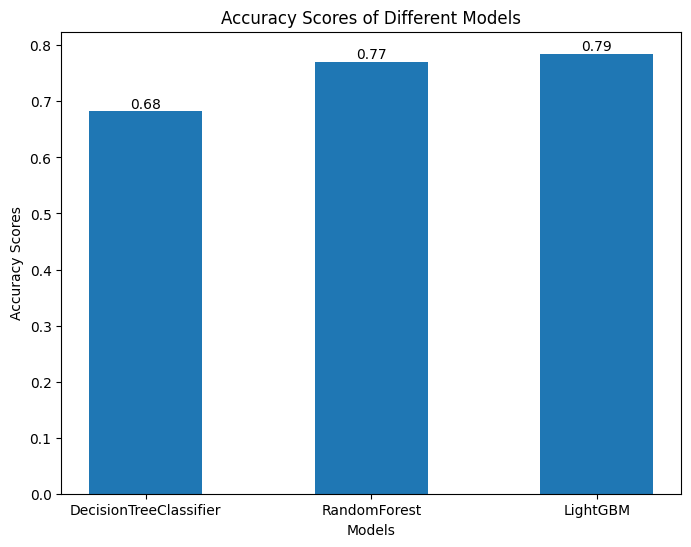

In [29]:
models = ['DecisionTreeClassifier','RandomForest', 'LightGBM']
accuracy_scores = [0.682, 0.771, 0.785]

plt.figure(figsize=(8,6))
plt.bar(models, accuracy_scores, width=0.5)
for i in range(len(models)):
    plt.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Different Models')
plt.show()

# **Submission**

In [30]:
submission = pd.DataFrame(columns = ["ID","Rating"])
submission["ID"] = [i for i in range(1,len(y_pred_lgbmClassifier)+1)]
submission["Rating"] = y_pred_lgbmClassifier
submission.to_csv('submission.csv',index=False)

In [31]:
submission["Rating"].value_counts()

Rating
5    4171
0     152
4     132
3      49
1      33
2       9
Name: count, dtype: int64

In [32]:
# 1. classification report and cofusion matrix
# 2. data imbalancing technique
# 3. explore Models and difference between model
# 4. Hyperparameter tuning for both random search and grid search
# 5. Difference between  bias and variance